# Twitter Sentiment Analysis Using Convolutional Neural Networks (CNN)

This project demonstrates how to analyze Twitter sentiment using a deep learning model based on Convolutional Neural Networks (CNNs).

# Objective

To classify tweets as positive, negative, or neutral based on their text content using a CNN-based model.

# Tech Stack
    Python 3.x
    TensorFlow/Keras
    NLTK
    Pandas, NumPy

# Dataset

    The project uses the Twitter_sentiment_Analysis_with_CNN.ipynb notebook with a preprocessed dataset structured similarly to Sentiment140. The dataset includes tweets labeled as:

    0: Negative

    2: Neutral

    4: Positive

    These are mapped internally to 0, 1, and 2 respectively.

# Data Preprocessing

    Text data is cleaned and tokenized using NLTK, stopwords are removed, and sequences are padded to ensure uniform input length. Tokenization is done using Tokenizer from Keras, and padding is performed to a max length of 50.

# Model

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Importing the dataset

In [4]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Feature Engineering

In [5]:
columns=df.columns
columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [6]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
y=df['sentiment']

## Splitting the dataset into Train and test split

In [9]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)


DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


## Building deep learning model

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [11]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [13]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [14]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [15]:
D=20 #Embedding dimension vector
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 116, 20)        │    10,549,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 114, 32)        │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,582,929 (40.37 MB)

 Trainable params: 10,582,929 (40.37 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)


Epoch 1/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1694s 158ms/step - accuracy: 0.7714 - loss: 0.4719 - val_accuracy: 0.8140 - val_loss: 0.4074
Epoch 2/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1644s 153ms/step - accuracy: 0.8250 - loss: 0.3883 - val_accuracy: 0.8204 - val_loss: 0.3942
Epoch 3/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1654s 149ms/step - accuracy: 0.8356 - loss: 0.3681 - val_accuracy: 0.8214 - val_loss: 0.3936
Epoch 4/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1697s 158ms/step - accuracy: 0.8439 - loss: 0.3529 - val_accuracy: 0.8175 - val_loss: 0.4007
Epoch 5/5
10720/10720 ━━━━━━━━━━━━━━━━━━━━ 1688s 157ms/step - accuracy: 0.8494 - loss: 0.3420 - val_accuracy: 0.8160 - val_loss: 0.4118


In [17]:
y_pred=model.predict(data_test)
y_pred

16500/16500 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step


array([[6.32437706e-01, 8.27761054e-11, 8.14486534e-11, 8.91863736e-11,
        3.67562354e-01],
       [9.21784222e-01, 2.66486806e-17, 3.10484493e-17, 3.21791655e-17,
        7.82157257e-02],
       [5.08549511e-01, 2.05854326e-19, 6.01965827e-20, 7.05756121e-20,
        4.91450429e-01],
       ...,
       [3.75704914e-02, 6.10961184e-19, 7.83753437e-20, 1.43158055e-19,
        9.62429464e-01],
       [8.47619832e-01, 1.05633493e-20, 3.13373700e-21, 7.18283416e-21,
        1.52380094e-01],
       [8.98709834e-01, 1.89832380e-19, 1.09122235e-19, 1.59745779e-19,
        1.01290174e-01]], dtype=float32)

In [18]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, ..., 4, 0, 0])

## Scoring

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

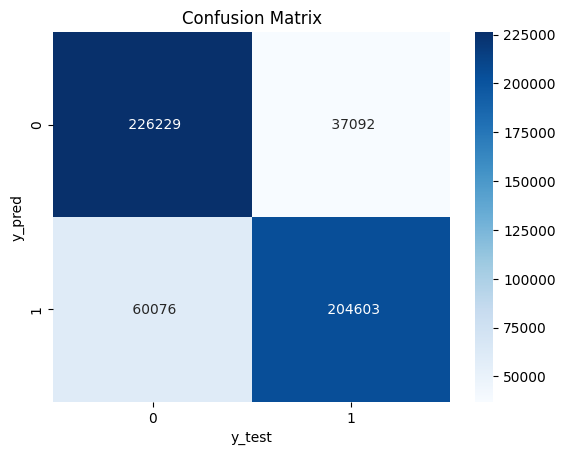

In [20]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82    263321
           4       0.85      0.77      0.81    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000

